<a href="https://colab.research.google.com/github/BuczynskiRafal/pipe_calculations/blob/main/Catchments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install extensions

In [4]:
!pip install pyswmm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import extensions

In [5]:
import pandas as pd
import numpy as np
from pyswmm import Simulation, Nodes, Links, Subcatchments, Output

# Manage file to get data to process

In [49]:
def get_runoff_with_slope(min_slope=0.05, max_slope=100, file_path='example.inp'):
    slope = []
    runoff = []
    s = min_slope
    while s < max_slope:
        slope.append(s)
        with Simulation(file_path) as sim:
            s1 = Subcatchments(sim)["S1"]
            s1.slope = s

            max_runoff = 0
            # Where your simulation runs
            for step in sim:
                if s1.runoff > max_runoff:
                    max_runoff = s1.runoff
            runoff.append(max_runoff)
            # print("For Slope: {}, max runoff is {}".format(slope, max_runoff))
        s += 0.05
    return {"slope": slope, "runoff": runoff}


def get_runoff_with_imperv(min_imperv=0.05, max_imperv=100, file_path='example.inp'):
    imperv = []
    runoff = []
    ipv = min_imperv
    while ipv < max_imperv:
        imperv.append(ipv)
        with Simulation(file_path) as sim:
            s1 = Subcatchments(sim)["S1"]
            s1.percent_impervious = ipv

            max_runoff = 0
            # Where your simulation runs
            for step in sim:
                if s1.runoff > max_runoff:
                    max_runoff = s1.runoff
            runoff.append(max_runoff)
            # print("For Slope: {}, max runoff is {}".format(slope, max_runoff))
        ipv += 0.05
    return {"imperv": imperv, "runoff": runoff}

# Get runoff data from model 

In [50]:
slope_data = get_runoff_with_slope()
imperv_data = get_runoff_with_imperv()

In [48]:
print(imperv_data)
# dfa = pd.DataFrame(data=imperv_data, columns=["imperv", "runoff"])
# dfa

{'%_Imperv': [0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35, 0.39999999999999997, 0.44999999999999996, 0.49999999999999994, 0.5499999999999999, 0.6, 0.65, 0.7000000000000001, 0.7500000000000001, 0.8000000000000002, 0.8500000000000002, 0.9000000000000002, 0.9500000000000003, 1.0000000000000002, 1.0500000000000003, 1.1000000000000003, 1.1500000000000004, 1.2000000000000004, 1.2500000000000004, 1.3000000000000005, 1.3500000000000005, 1.4000000000000006, 1.4500000000000006, 1.5000000000000007, 1.5500000000000007, 1.6000000000000008, 1.6500000000000008, 1.7000000000000008, 1.7500000000000009, 1.800000000000001, 1.850000000000001, 1.900000000000001, 1.950000000000001, 2.000000000000001, 2.0500000000000007, 2.1000000000000005, 2.1500000000000004, 2.2, 2.25, 2.3, 2.3499999999999996, 2.3999999999999995, 2.4499999999999993, 2.499999999999999, 2.549999999999999, 2.5999999999999988, 2.6499999999999986, 2.6999999999999984, 2.7499999999999982, 2.799999999999998, 2.849999999999998, 2.899999999

# prepare dataframe

In [51]:
df_slope = pd.DataFrame(data=slope_data, columns=["slope", "runoff"])
df_imperv = pd.DataFrame(data=imperv_data, columns=["imperv", "runoff"])
print(df_imperv)

      imperv    runoff
0       0.05  0.428333
1       0.10  0.428333
2       0.15  0.428333
3       0.20  0.428333
4       0.25  0.428333
...      ...       ...
1995   99.80  0.428333
1996   99.85  0.428333
1997   99.90  0.428333
1998   99.95  0.428333
1999  100.00  0.428333

[2000 rows x 2 columns]


# Plot slope data

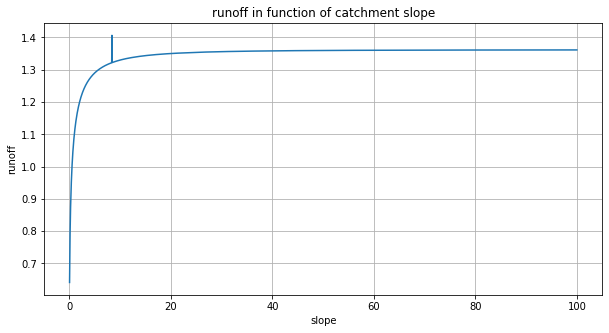

In [42]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,5)
plt.plot(df_slope['slope'], df_slope['runoff'])
plt.title('runoff in function of catchment slope')
plt.xlabel('slope')
plt.ylabel('runoff')
plt.grid(True)
plt.show()

# Plot imperv data

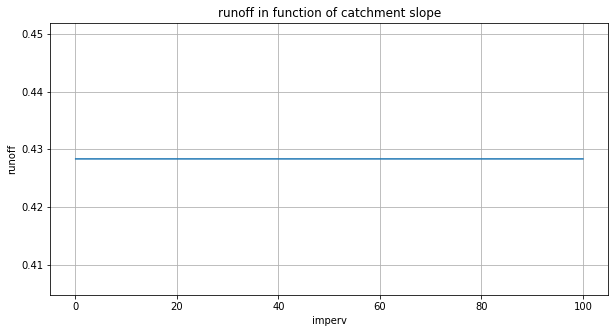

In [52]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,5)
plt.plot(df_imperv['imperv'], df_imperv['runoff'])
plt.title('runoff in function of catchment slope')
plt.xlabel('imperv')
plt.ylabel('runoff')
plt.grid(True)
plt.show()